# Probability Assignment

To get full credit in this assignment you need to use only `numpy` or `jax` libraries  and include adequate explanation of the code in either markdown cells or code comments. Sometimes you need to type equations - type equations in latex math notation. 

PS: Please note that we run through chatGPT the questions and you will be referred to the Dean if we find that a robot answered your questions. .

## Question 1a (10 points)

In a private subreddit people are posting their opinions on the CEO of the company you work for. Lets assume that the employees that are posting are random logging in to that subreddit and that each post indicates whether the employee approves or not the job that the CEO is doing. Let $x_i$ be the binary random variable where $x_i=1$ indicates approval. You can assume that $x$ is distributed according to a Bernoulli distribution with parameter $p=1/2$.

Your job is to sample $n=50$ posts and estimate the approval rate of the CEO by considering the statistics of $y=x_1+x_2+ \dots + x_n$. What is the probability that 25 employees approve the CEO?

## Question 1b (10 points)

Following your findings in Q1a, read about the [Cenral Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) and recognize that 

$$z=\frac{y-\mu_y}{\sigma_y}$$ 

is normally distributed with mean 0 and variance 1.

Can you find the  probability that 25 employees approve the CEO using the Gaussian approximation?


0.11227517265921705

0.843118853945781

Question 1a

In [ ]:
import numpy as np

n = 50

p = 0.5

ans = np.math.comb(n, 25) * (p ** 25) * ((1-p) ** (n-25))

ans

0.11227517265921705

Question 1b

In [ ]:
import numpy as np

mean = 20
std = 5
y = 25
z = (y - mean) / std

prob = 0.5 * (1 + np.sign(z) * np.sqrt(1 - np.exp(-2 * z ** 2 / np.pi)))

prob

0.843118853945781

## Question 2 (20 points)

A sequential experiment involves repeatedly drawing a ball from one of the two urns, noting the number on the ball and replacing the ball in the urn. Urn 0 contains a ball with the number 0 and two balls with the number 1. Urn 1 contains five balls with the number 0 and one ball with the number 1. 

The urn from which the first ball is drawn is selected by flipping a fair coin. Urn 0 is used if the outcome is H and urn 1 is used if the outcome is T. **The urn used in a subsequent draws corresponds to the number on the ball drawn in the previous draw.** 

What is the probability of a specific sequence of the numbers on drawn balls being 0011 ? 

Type the answer here using the [latex syntax](https://wch.github.io/latexsheet/) or handwrite the answer, upload the picture in the same folder and use a new markdown cell with markdown syntax `![title](image_name.png)`

P(0011) = P(H) * P(0|H) * P(0|0) * P(1|0) * P(1|1) + P(T) * P(0|T) * P(0|0) * P(1|0) * P(1|1) = 
(1/2) * (1/3) * (1/3) * (2/3) * (2/3) + (1/2) * (5/6) * (1/3) * (2/3) * (1/6) = 
(1/18) + (5/72) 
= 7/36

## Question 3 (20 points) 

Referring to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf), simulate and plot the bivariate normal distribution with the shown parameters using the [Cholesky factorization](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cholesky.html) for the simulation. 


In [ ]:
# Type the Python code here and ensure you save the notebook with the results of the code execution.

## Question 4 (20 points)

Go through the provided links on [Poisson](https://dlsun.github.io/probability/poisson.html) and [exponential distributions](https://dlsun.github.io/probability/exponential.html) as the `Math for ML` textbook in your course site  is not covering enough these important distributions.

Watch this video https://www.youtube.com/watch?v=Asto3RS46ks where the author is explaining how to simulate a Poisson distribution from scratch. 

1. Using the Kaggle API download [this dataset](https://www.kaggle.com/datasets/new-york-city/nyc-east-river-bicycle-crossings) and plot the histogram of the number of cyclists that cross the Brooklyn bridge per day.  
2. Simulate the number of cyclists that cross the Brooklyn bridge per day using the Poisson distribution. Ensure that the simulated counts are similar distribution-wise to the observed counts.


Saving kaggle.json to kaggle (12).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
nyc-east-river-bicycle-crossings.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/nyc-east-river-bicycle-crossings.zip
replace nyc-east-river-bicycle-counts.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: nyc-east-river-bicycle-counts.csv  
Invalid folder: /content/nyc-east-river-bicycle-counts.csv


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47de520f70>]],
      dtype=object)

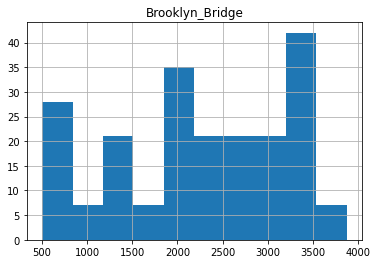

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download new-york-city/nyc-east-river-bicycle-crossings
! unzip /content/nyc-east-river-bicycle-crossings
! kaggle datasets init -p '/content/nyc-east-river-bicycle-counts.csv'

crossings = pd.read_csv('/content/nyc-east-river-bicycle-counts.csv')
crossings.columns = [c.replace(' ', '_') for c in crossings.columns]
crossings.hist('Brooklyn_Bridge')

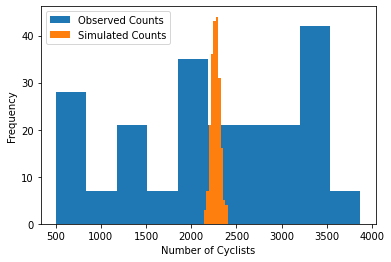

In [27]:
import matplotlib.pyplot as plt

observed_counts = crossings['Brooklyn_Bridge']
mean = np.mean(observed_counts)
simulated_counts = np.random.poisson(mean, len(observed_counts))

plt.hist(observed_counts, label="Observed Counts")
plt.hist(simulated_counts, label="Simulated Counts")

plt.xlabel("Number of Cyclists")
plt.ylabel("Frequency")
plt.legend()

plt.show()

# Question 5 (20 points)

You are asked to stress test an cloud API endpoint and are told that the API exposes a database server that can be abstracted as an M/M/1 queue. Go through [this introductory](https://queue-it.com/blog/queuing-theory/) page to just understand the queuing domain and the notation M/M/1. Go also through the elements of the MM1 queue [here](https://en.wikipedia.org/wiki/M/M/1_queue). Make sure you click on the links and learn about the random process called Poisson process. 


Your task is to simulate the behavior of the queue and plot the number of requests that are waiting in the queue as a function of time. You are given three arrival rates of the API requests $\lambda=[1, 3, 4]$ and the service time of the requests as an exponential random variable with rate $\mu=4$. 

   

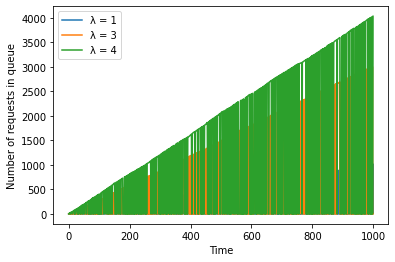

In [3]:
import numpy as np
import matplotlib.pyplot as plt

lambdas = [1, 3, 4]
mean = 4

sim = 1000

# Number of requests in the queue as a function of time
queue_len = np.zeros((len(lambdas), sim))

for i, lam in enumerate(lambdas):
    time = 0
    request = 0
    while time < sim:
        inter_arrival = np.random.exponential(scale=1/lam)
        time += inter_arrival
        if time < sim:
            service_time = np.random.exponential(scale=1/mean)
            request += 1
            for t in range(int(time), int(time+service_time)):
                if t < sim:
                    queue_len[i][t] = max(request-1, 0)
                    
for i in range(len(lambdas)):
    plt.plot(queue_len[i], label=f'λ = {lambdas[i]}')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of requests in queue')
plt.show()